In [2]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

In [3]:
BERT_MODEL_NAME = "all-MiniLM-L6-v2" # 384

# Carregar os dados
file_path = "./issues_sp_with_project_stats.csv"
df = pd.read_csv(file_path)

# Reduzindo a amostragem para evitar estouro de memória
# df_sampled = df.sample(frac=0.5, random_state=42).reset_index(drop=True)

# Pega todos os exemplos.
df_sampled = df.copy()

# Pega um projeto
#df_sampled = df[df["Project_ID"] == PROJECT_ID].copy() 

# Criando embeddings BERT Sentence Transformers para as issues
bert_model = SentenceTransformer(BERT_MODEL_NAME) 

df_sampled["Full_Text"] = df_sampled["Title"].fillna("") + " " + df_sampled["Description"].fillna("")
df_sampled["BERT_Embedding"] = df_sampled["Full_Text"].apply(lambda x: bert_model.encode(x, convert_to_numpy=True))

# Convertendo os embeddings para matriz
embedding_matrix = np.vstack(df_sampled["BERT_Embedding"].values)

node_features = embedding_matrix #sem pca - 384

np.save("embeddings.npy", node_features) 
df_sampled.to_pickle("df_sampled.pkl")

# Verificar quantas amostras foram processadas
print("Número de amostras processadas:", df_sampled.shape[0])

/opt/conda/envs/py_3.10/lib/python3.10/site-packages/torch/nn/modules/linear.py:125: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:310.)
  return F.linear(input, self.weight, self.bias)


Número de amostras processadas: 20757


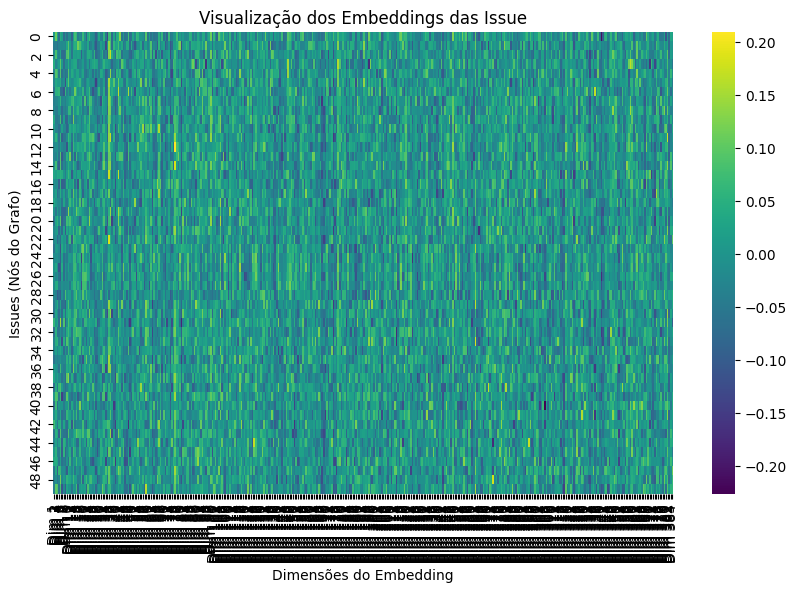

Shape de node_features: (20757, 384)
Exemplo de embedding: [ 5.99045958e-03  1.08819000e-01  2.04890911e-02 -7.44813234e-02
  4.50464971e-02  2.25152243e-02 -6.95711896e-02 -1.60085708e-02
 -6.13132678e-02 -1.85447466e-02 -1.77012961e-02 -8.78611058e-02
  2.10672282e-02  7.93595463e-02  6.02005646e-02 -4.16367278e-02
 -1.56776551e-02 -3.86819057e-02  6.55502379e-02 -8.76358990e-03
 -8.97014812e-02  3.33006233e-02  6.77965730e-02 -4.12100973e-03
 -1.32414009e-02 -2.91379113e-02 -8.83947611e-02 -4.35311496e-02
  3.08498386e-02 -3.49459127e-02 -4.08094190e-02  5.52135520e-02
 -5.15083447e-02 -1.34310752e-01  7.06499815e-02  7.88054690e-02
 -7.63875842e-02  2.64028925e-02 -6.17056526e-02  4.15765457e-02
  5.29797487e-02  1.32580236e-01 -5.91672547e-02  4.49461257e-03
 -5.99047951e-02 -5.04913963e-02  7.95366392e-02 -6.71191812e-02
 -5.82088716e-02  2.91169621e-02 -2.25944184e-02  6.36043251e-02
  5.33167012e-02 -2.93353735e-03  4.56498907e-04 -1.14453323e-02
 -4.88523953e-02  9.52290595e-0

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a distribuição dos embeddings reduzidos
plt.figure(figsize=(10, 6))
sns.heatmap(node_features[:50], cmap="viridis", xticklabels=[f"Dim {i+1}" for i in range(384)])
plt.xlabel("Dimensões do Embedding")
plt.ylabel("Issues (Nós do Grafo)")
plt.title("Visualização dos Embeddings das Issue")
plt.show()

# Verificando os resultados
print(f"Shape de node_features: {node_features.shape}")  # Deve ser (num_nos, 8)
print(f"Exemplo de embedding: {node_features[0]}")

In [7]:
import torch

node_features = np.load("./embeddings.npy")
df_sampled = pd.read_pickle("./df_sampled.pkl")

node_features = torch.tensor(node_features, dtype=torch.float32).clone().detach()
print("Amostras no df_sampled:", df_sampled.shape[0])
print("Amostras nos embeddings:", node_features.shape[0])

Amostras no df_sampled: 20757
Amostras nos embeddings: 20757


In [9]:
df.columns

Index(['Repository_ID', 'Repository_Name', 'Project_ID', 'Project_Name',
       'Issue_ID', 'Title', 'Description', 'Assignee_ID', 'Story_Point',
       'In_Progress_Date', 'Resolution_Date', 'Creation_Date', 'Creator_ID',
       'Developer_AR', 'Reputation_t', 'Issue_Type', 'Num_Comentarios',
       'Comentarios_Assignee', 'SP_Intervalo_Projeto', 'Project_SP_Std'],
      dtype='object')